# Scipy : Librería Cientifica de Python

Referencia: Francisco J.Blanco-Silva Mastering SciPy.

[SciPy](http://www.scipy.org)  es la librería de  computación científica para Python, de hecho es más bien una colección de librerías para la computación científica de alto nivel, que son más o menos independientes unas de otras. La biblioteca SciPy se construye sobre  NumPy, que le  proporciona las estructuras de arrays básicas y las operaciones fundamentales en este tipo de arrays. Los módulos en SciPy proporcionan  computación de alto nivel para diversas áreas como:  


* Modelamiento y fijado de datos.
* Optimización
* Procesamiento de imaǵenes.
* Estadistica y probabilidades
* Clusters
* Interpolación
* Álgebra lineal
* etc.

Mayor información en [la documentación de Scipy](https://www.scipy.org/getting-started.html).
  
Scipy no tiene módulos de Analisis Bayesiano, es decir no tiene capacidades para **MCMC (Markov Chain Monte Carlo)**, pero existen otras alternativas como [PyMC](https://github.com/pymc-devs/pymc) o los [SciKits](https://scikits.appspot.com/).
 
 

## Optimización

Scipy contiene el módulo `optimize` para problemas de optimización no lineal númericos, donde la solución de los ceros de la derivada o del gradiente y probar el resultado como candidato de optimalidad no es factible.

In [22]:
import scipy
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#help(optimize) 

In [23]:
# uso de optimize.brent

def fun1(x):
    return 2*np.pi*x**2 + 2/x
x_min = optimize.brent(fun1, brack=(0.1, 5))
x_min

0.54192606489766715

In [24]:
fun1(x_min)

5.5358104459320856

In [25]:
from scipy import optimize as opt

def f(x):
    return x**4 + 3*(x-2)**3 - 15*(x)**2 -7*(x) + 1

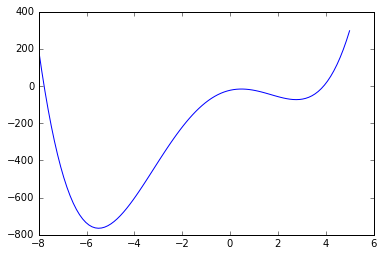

In [26]:
x = np.linspace(-8, 5, 100)
plt.plot(x, f(x));

In [27]:
# utilicemos minimize_escalar: funcion para encontrar minimos
opt.minimize_scalar(f, method='Brent')

  fun: -73.240924695745946
 nfev: 12
    x: 2.7666774362281976
  nit: 11

In [28]:
opt.minimize_scalar(f, method='bounded', bounds=[0, 6])

    nfev: 12
 success: True
     fun: -73.24092469574272
  status: 0
 message: 'Solution found.'
       x: 2.7666777288226383

In [29]:
# El algoritmo basin hooping. Ejemplo de la documentacion de scipy

from scipy.optimize import basinhopping
func = lambda x: np.cos(14.5 * x - 0.3) + (x + 0.2) * x
x0=[1.]
minimiza_metodo={"method":"BFGS"}
ret = basinhopping(func, x0, minimizer_kwargs=minimiza_metodo,
                  niter=200)
print("Minimo global: x = %.4f, f(x0) = %.4f" % (ret.x, ret.fun))

Minimo global: x = -0.1951, f(x0) = -1.0009


In [30]:
# En el caso de dos dimensiones

def func2d(x):
    f = np.cos(14.5 * x[0] - 0.3) +(x[1] +0.2) * x[1] + (x[0] + 0.2)*x[0]
    df = np.zeros(2)
    df[0] = -14.5 * np.sin(14.5 * x[0] - 0.3) + 2. * x[0] + 0.2
    df[1] = 2. * x[1] + 0.2
    return f, df

minimiza_metodo = {"method":"L-BFGS-B", "jac":True}
x0 = [1.0, 1.0]
ret = basinhopping(func2d, x0, minimizer_kwargs=minimiza_metodo,niter=200)

print("Minimo global: x = [%.4f, %.4f], f(x0) = %.4f" % (ret.x[0],ret.x[1], ret.fun))

Minimo global: x = [-0.1951, -0.1000], f(x0) = -1.0109


### Ajuste de datos

Hay un número de rutinas en Scipy para realizar ajuste de datos, por ejemplo `curve_fit`. Mayor información de esta rutina, se puede encontrar [aquí](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit).

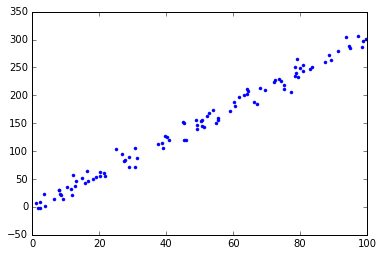

In [33]:
from scipy.optimize import curve_fit

x = np.random.uniform(0., 100., 100)
y = 3. * x + 2. + np.random.normal(0., 10., 100)
plt.plot(x, y, '.')

In [34]:
# Calculemos una linea de ajuste

def linea(x, a, b):
    return a * x + b

In [39]:
param, pcov = curve_fit(linea, x, y)
param

array([ 3.04075091, -0.77788152])

In [41]:
pcov

array([[  1.28771005e-03,  -6.17203622e-02],
       [ -6.17203622e-02,   4.04972702e+00]])

<Container object of 3 artists>

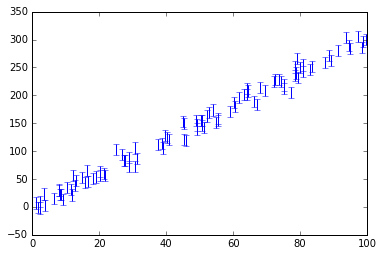

In [45]:
# probemos ahora asumiendo que los datos tengan una desviacion estandar
# de +/-10

import warnings
warnings.filterwarnings("ignore", module="matplotlib")
e = np.repeat(10., 100)
plt.errorbar(x, y, yerr=e, fmt=None)

In [47]:
param, pcov = curve_fit(linea, x, y, sigma=e)
param

array([ 3.0407509 , -0.77788128])

In [49]:
print ("a =", param[0], "+/-", pcov[0,0]**0.5)
print ("b =", param[1], "+/-", pcov[1,1]**0.5)

a = 3.04075090188 +/- 0.0358846996117
b = -0.777881281551 +/- 2.01239427856


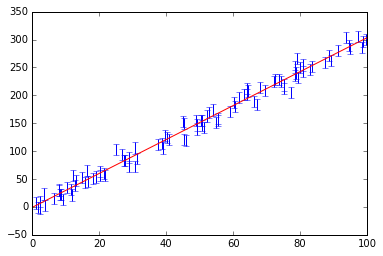

In [51]:
# Graficamos la linea de mejor ajuste

plt.errorbar(x, y, yerr=e, fmt=None)
xfine = np.linspace(0., 100., 100)  # define valores para la funcion 
plt.plot(xfine, linea(xfine, param[0], param[1]), 'r-')

## Integración 

En Scipy el principal propósito de la .integración es obtener soluciones numéricas.

Calculemos como ejemplo: $$ \int_{0}^3 \cos^2(e^x) \ dx$$

In [2]:
import numpy as np 
from scipy.integrate import quad

# Defininamos la funcion a integrar

func = lambda x: np.cos(np.exp(x))**2

# Integrar la función con los limites 0 y 3 respectivamente

solucion = quad(func, 0,3)
print(solucion)

(1.296467785724373, 1.3977971863744082e-09)


El primer elemto es el valor deseado y el segundo es el error  en el ejemplo anterior.

Ejercicio: Calcula lo siguiente $$\int_{0}^{1}\sin(x^2)\ dx$$

## Integración Numérica


In [7]:
import numpy as np
from scipy.integrate import quad, trapz

# Colocando los datos simulados (fake dates )

x = np.sort(np.random.randn(150)*4 + 4).clip(0,5)
func = lambda x: np.sin(x) *np.cos(x ** 2) + 1 
y = func(x)

# Itegrando desde los limites : 0 y 5
fsolucion = quad(func, 0, 5)
dsolucion = trapz(y, x =x)

print("fsolucion = " + str(fsolucion[0]))
print("dsolucion = " +  str(dsolucion))

print(" La diferencia entre estos dos metodos es " \
      +  str(np.abs(fsolucion[0] -dsolucion)))

fsolucion = 5.100345067540932
dsolucion = 5.08425628579
 La diferencia entre estos dos metodos es 0.0160887817531


## Scipy para data mining (mineria de datos)

Módulos a usar:

- `scipy.stats`: módulo de herramientas estadísticas
- `scipy.ndimage.measurements`: módulo  de análisis y organización  de datos.
- `scipy.spatial`.
- `scipy.cluster`

El paquete `scipy.cluster` consiste de dos módulos: `scipy.cluster.vq` y `scipy.cluster.hierarchy`.

## Cuantización de Vector (VQ)

Es un término que está asociado con el procesamiento de señales compresión de datos y clustering. En este ejemplo nos vamos a centrar en la cuantización de vector como  componente clustering empezando con llenar de datos al paquete VQ de manera de identificar los cluster:

In [1]:
import numpy as np
from scipy.cluster import vq

# Creando datos

c1 = np.random.randn(100, 2) + 5
c2 = np.random.randn(30, 2) - 5
c3 = np.random.randn(50,2)

# Creando una matriz para juntar datos (array de 180x2)

data = np.vstack([c1, c2, c3])

# Calculando el centroide del cluster  y la varianza desde k-means

centroide, varianza = vq.kmeans(data, 3)

# Separando los puntos en el cluster basados en la funcion vq

identi, distancia = vq.vq(data, centroide)

# Recuperando las coordenadas para los puntos en cada vq

vqc1 = data[identi == 0]
vqc2 =data[identi == 1]
vqc3 = data[identi == 2]

In [2]:
centroide

array([[ 0.13303675, -0.05277057],
       [ 4.94743764,  5.11416207],
       [-4.90125862, -4.98656738]])

In [3]:
varianza

1.1973866595112574

In [4]:
vqc1

array([[-0.60118434, -1.40228847],
       [ 0.21340528, -1.93385529],
       [-0.45166722, -0.53299176],
       [-0.93181297,  0.43310475],
       [-0.67424634, -0.09126108],
       [ 0.63185292, -0.9356187 ],
       [ 0.44379495,  1.06023639],
       [ 0.54816535, -0.9316109 ],
       [ 1.14808018, -2.71156065],
       [ 0.02479205,  2.31613159],
       [ 0.21447867,  1.821523  ],
       [ 0.37743134,  0.04478592],
       [-1.22752463,  1.13916886],
       [ 0.47108522,  1.78837662],
       [-0.21779439,  0.17070855],
       [ 1.31797411,  1.80874521],
       [-0.27648544, -1.09621865],
       [-1.75380668,  0.37980429],
       [ 0.53669507, -0.72063633],
       [-0.82949971, -1.03639442],
       [-2.03820997, -0.91392883],
       [-0.49153928,  1.10783514],
       [ 1.35527378, -1.12522855],
       [-0.08264612, -0.23292068],
       [ 1.51232234, -0.96244094],
       [ 0.84480294,  1.33128031],
       [ 0.17392695, -1.55114604],
       [ 0.05472991, -1.77314172],
       [ 0.67670017,

## Jerarquía de clusters

Clustering es una técnica de data minning, cuyo proceso consiste en la división de datos en grupos de objetos similares. Cuando se representan la información obtenida a través de clusters se pierden algunos detalles de los datos, pero a la vez se simplifica dicha información.

Las técnicas de Clustering son las que utilizando algoritmos matemáticos se encargan de agrupar objetos. Usando la información que brindan las variables que pertenecen a cada objeto se mide la similitud entre los mismos, y una vez hecho esto se colocan en clases que son muy similares internamente (entre los miembros de la misma clase) y a la vez diferente entre los miembros de las diferentes clases. 

Un algoritmo importante se llama k-means:

Este algoritmo debe definir el número de clusters que se desean obtener, así se convierte en un algoritmo voraz para particionar. Este algoritmo funciona de la siguiente manera: primeramente se determina la cantidad de clusters en los que se quiere agrupar la información, en este caso las simulaciones. Luego se asume de forma aleatoria los centros por cada clusters. Una vez encontrados los primeros centroides el algoritmo hará los tres pasos siguientes:

1 . Determina las coordenadas del centroide.

2 . Determina la distancia de cada objeto a los centroides.

3 .Agrupa los objetos basados en la menor distancia.



Es una herramienta para identificar estructuras que están anidadas dentro de otras grandes estructuras. Hagamos un ejemplo para generar un sistema múltiple de cluster. Para emplear la función (hierarchy) que permite esto, hay que construir la MATRIZ DISTANCIA. 

In [41]:
import numpy as np
import matplotlib.pyplot as mpl
#from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import pdist, squareform
import scipy.cluster.hierarchy as hy

# Creando un cluster de una funcion clusters

def clusters(numbers = 20, cnumber = 5, csize  = 10):
    
    rnum  =np.random.rand(cnumber, 2)
    rn =rnum[:, 0] * numbers
    rn = rn.astype(int)
    rn[np.where(rn < 5)] = 5
    rn[np.where(rn > numbers/2.0)] = round(numbers/2., 0)
    ra = rnum[:, 1] * 2.9
    ra[np.where(ra < 1.5)]  =1.5
    
    cls = np.random.rand(numbers, 3) * csize
    
# Multiplicadores aleatorios para puntos centrales del cluster

    rxyz = np.random.rand(cnumber - 1, 3)
    for i in range(cnumber - 1):
        tmp = np.random.rand(rn[i +1], 3)
    
        x = tmp[:, 0] + (rxyz[i, 0] * csize)
        y = tmp[:, 1] + (rxyz[i, 1] * csize)
        z = tmp[:, 2] + (rxyz[i, 2] * csize)
    
        tmp = np.column_stack([x ,y, z])
        cls = np.vstack([cls, tmp])

    return cls

# Generamos un cluster de cluster y la matriz distancia

cls = clusters()
D = pdist(cls [:, 0:2])
D = squareform(D)
# Calculamos y dibujamos nuestro primer dendrograma
    
fig = mpl.figure(figsize=(8,8))
ax1 = fig.add_axes([0.09, 0.1, 0.2, 0.6])
Y1 = hy.linkage(D, method = 'complete')
cutoff = 0.3 *np.max(Y1[:,2])
Z1 = hy.dendrogram(Y1,  orientation = 'right', color_threshold =cutoff)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)

# Calculemos y dibujemos el segundo dendrograma
ax2 = fig.add_axes([0.3, 0.71, 0.6, 0.2])
Y2 = hy.linkage(D, method = 'average')
cutoff = 0.3 *np.max(Y2[:,2])
Z2 = hy.dendrogram(Y2,  color_threshold =cutoff)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)

    
# Graficando la matriz distancia

ax3 = fig.add_axes([0.3, 0.1, 0.6, 0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = D[idx1,:]
D = D[:, idx2]
ax3.matshow(D, aspect = 'auto', origin = 'lower', cmap = mpl.cm.YlGnBu)
ax3.xaxis.set_visible(False)
ax3.yaxis.set_visible(False)
    
# Colores

fig.savefig('clusterq.pdf', bbox ='tight')


## Modelamiento de datos y ajustes

Hya varias maneras de 'fijar datos' con una regresión lineal.  En esta parte usaremos `curve_fit` que un método $\chi^2$. En el ejemplo a mostrar vamos a generar data desde una funcion conocida y ajustaremos con `curve_fit`. La función que usaremos como modelo es una función lineal $ f(x) = ax +b$.

In [43]:
import numpy as np
from scipy.optimize import curve_fit

# Creando una función  para modelar y crear datos

def func(x, a,b):
    return  a*x + b

# Generando datos 'clean'
x = np.linspace(0, 10, 100)
y = func(x, 1, 2)

#  Agregando informacion('noise') a la data

yn = y + 0.2 *np.random.normal(size = len(x))

# Ejecutar curve_fit sobre los datos
# popt devueleve los mejores valores ajustados
# por los parametros del modelo dado

popt, pcov =curve_fit(func, x, yn)

print(popt)

[ 0.9869579   2.03344083]


También se puede hacer ajustes a funciones no lineales como

$$
a * \exp \Bigl(\dfrac{-(x -\mu)^2}{2\sigma^2}\Bigr)
$$

In [44]:
#  Creando una función para modelar los datos creados

def func(x, a, b,c ):
    return a*np.exp(-(x -b)**2/(2*c**2))

# Generando datos 'clean'
x = np.linspace(0, 10, 100)
y = func(x, 1, 5,  2)

#  Agregando informacion('noise') a la data

yn = y + 0.2 *np.random.normal(size = len(x))

# Ejecutar curve_fit sobre los datos
# popt devueleve los mejores valores ajustados
# por los parametros del modelo dado

popt, pcov =curve_fit(func, x, yn)

print(popt)

[-0.40163867  0.1935454  -0.06530845]


## Matrices Sparse 

¿ Qué pasaría si queremos manejar matrices de $10^{10}$ elementos?.

Si la matriz tiene muchos ceros, entonces es posible manejar de manera eficiente este tipo de matriz, que es llamada Sparse.

In [47]:
import numpy as np
from  scipy.sparse.linalg import eigsh
from  scipy.linalg import eigh
import scipy.sparse
import time

N = 300
#  Creamos una matriz aleatoria de tipos sparse

m = scipy.sparse.rand(N,N)
                     
a = m.toarray() # clon de Numpy para m
                      
print("El array de NUmpy tiene"  + str(a.nbytes) + ' bytes')
print("El matriz sparse tiene"  + str(m.data.nbytes) + ' bytes')

# No-sparse

t0 = time.time()
res1 = eigh(a)
dt = str(np.round(time.time() -t0, 3)) + 'segundos '
print("La operaciones no-sparse toman" + dt)

# sparse

t0 = time.time()
res1 = eigsh(m)
dt = str(np.round(time.time() -t0, 3)) + 'segundos '
print("La operaciones sparse toman" + dt)

El array de NUmpy tiene720000 bytes
El matriz sparse tiene7200 bytes
La operaciones no-sparse toman0.522segundos 
La operaciones sparse toman0.068segundos 


##  Estadística 

Numpy tiene  las funciones básicas de la estadística `mean`, `std`, `median`, `argmin` y `argmax ` , sin embargo  `numpy.arrays` tiene métodos construidos para las más importantes aplicaciones.

In [1]:
# Ejemplo de estadística

import numpy as np

# Construyamos un array aleatorio con 1000 elementos

x = np.random.rand(10000)

# Calcular varios métodos estadísticos que Numpy tiene

mean = x.mean()
std = x.std()
var = x.var()

In [2]:
mean

0.50142838297184589

In [3]:
std

0.2854488682881513

In [4]:
var

0.081481056406986357

Scipy contiene en el módulo [scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html) una extensa colección de herramientas para la estadistica y las probabilidades. como es el caso de las distribuciones continuas, discretas y multivariadas. 

Cuando llamamos a distribución desde `scipy.stats`, podemos extraer información de varias maneras: PDF, CDF, RVS. 

$$
PDF = e^{(-x^2/2)/\sqrt{2\pi}}
$$

In [7]:
# Ejemplo de probabilidades: PDF de la RV normal

import numpy as np
from scipy.stats import norm

# Rango de la muestra a tomar

x = np.linspace(-5, 5, 100000)

# Colocando los parametros para la distribucion normal

dist = norm( loc = 0, scale = 1)

# Recuperando PDF y CDF de la distribucion normal

pdf = dist.pdf(x)
cdf = dist.cdf(x)

# Recupperando RVS ( Muestreo de la variable aleatoria)
muestreo = dist.rvs(500) 

In [8]:
pdf

array([  1.48671951e-06,   1.48746306e-06,   1.48820696e-06, ...,
         1.48820696e-06,   1.48746306e-06,   1.48671951e-06])

In [9]:
cdf

array([  2.86651572e-07,   2.86800282e-07,   2.86949067e-07, ...,
         9.99999713e-01,   9.99999713e-01,   9.99999713e-01])

 Ejercicio: Hallar mediante `scipy.stats` el PMF, CDF y RVS de la distribución geométrica, cuyo PMF es
 
 $$
 PMF = (1 -p)^{k -1}p
 $$

In [16]:
import numpy as np
from scipy.stats import geom

# Parametros de la distribucion geometrica

p = 0.5
dist = geom(p)

# rango de valores 
x = np.linspace(0, 5, 1000)

# Recuperando PDF y CDF de la distribucion normal
pmf = dist.pmf(x)
cdf = dist.cdf(x)

# Recupperando RVS ( Muestreo de la variable aleatoria)
muestreo = dist.rvs(500) 

In [20]:
muestreo

array([ 1,  2,  1,  1,  3,  2,  1,  1,  3,  2,  1,  4,  1,  4,  1,  4,  1,
        2,  1,  1,  1,  1,  2,  1,  1,  2,  2,  1,  2,  2,  2,  1,  1,  1,
        1,  7,  4,  2,  1,  3,  1,  1,  6,  3,  3,  1,  5,  6,  1,  2,  2,
        1,  1,  1,  1,  3,  1,  3,  1,  1,  3,  1,  1,  3,  2,  2,  1,  1,
        1,  1,  1,  1,  2,  2,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,
        1,  5,  3,  1,  1,  1,  1,  4,  2,  1,  2,  1,  1,  1,  1,  3,  1,
        3,  3,  8,  2,  2,  7,  1,  2,  2,  1,  3,  4,  1,  3,  4,  1,  3,
        2,  2,  2,  1,  1,  2,  1,  3,  1,  1,  4,  1,  8,  3,  1,  1,  2,
        5,  2,  2,  3,  3,  3,  4,  1,  1,  1,  2,  1,  2,  1,  1,  1,  1,
        3,  1,  1,  3,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,
        2,  1,  1,  3,  1,  1,  2,  2,  3,  2,  2,  2,  1,  3,  1,  1,  2,
        2,  1,  1,  4,  2,  7,  5,  2,  1,  1,  3,  1,  1,  2,  1,  2,  4,
        2,  2,  5,  2,  1,  1,  3,  2,  1,  1,  3,  2,  1,  1,  2,  2,  1,
        5,  1,  2,  2,  1